# Importing Necessary Libraries

In [15]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib


In [28]:
data_dir = pathlib.Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")


# Defining Categories and Loading Images

In [27]:


# Categories for rice types

categories = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']



# Load a limited number of images for each category

image_lists = {category: list(data_dir.glob(f'{category}/*'))[:600] for category in categories}



# Print the number of images loaded for each category

for category, images in image_lists.items():

    print(f"{category}: {len(images)} images loaded")


Arborio: 600 images loaded
Basmati: 600 images loaded
Ipsala: 600 images loaded
Jasmine: 600 images loaded
Karacadag: 600 images loaded


# Displaying Sample Images from Each Category

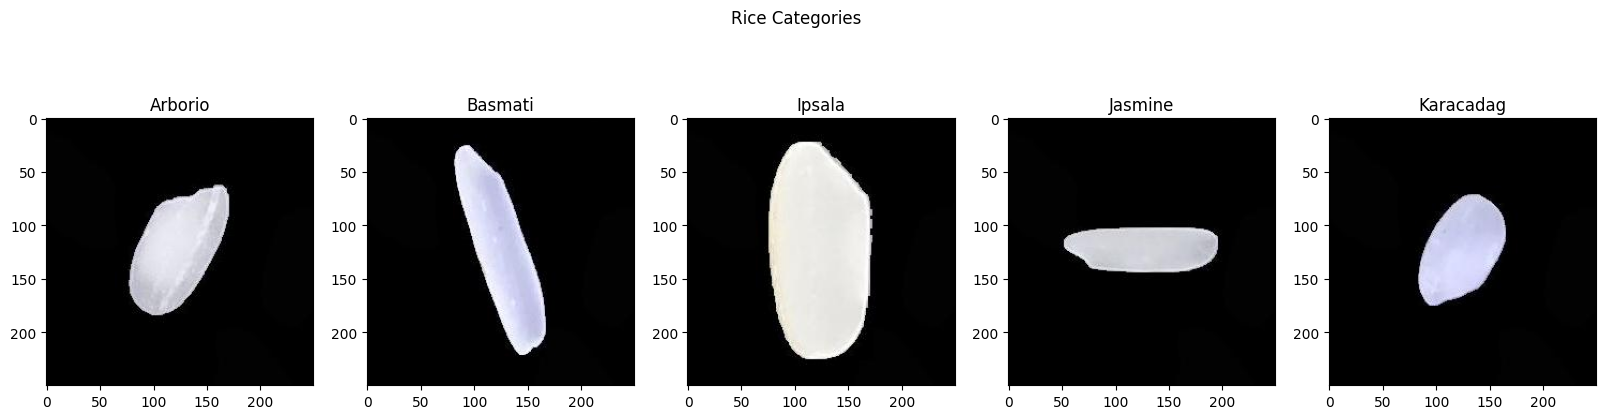

In [29]:
import cv2
import matplotlib.pyplot as plt

# Create a figure with 5 columns
fig, ax = plt.subplots(ncols=len(categories), figsize=(20, 5))
fig.suptitle('Rice Categories')

# Loop through the categories and display the first image from each
for i, category in enumerate(categories):
    image_path = str(image_lists[category][0])  # Get the first image path as a string
    image = cv2.imread(image_path)  # Read the image with cv2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    ax[i].imshow(image)  # Display the image
    ax[i].set_title(category)  # Set the title for the subplot
    ax[i].axis('on')  # Turn on the axis for context

# Show the plot
plt.show()


# Create the Labels

In [30]:
    # Define the categories for rice types
categories = ['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag']
print("Categories defined:", categories)


Categories defined: ['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag']


In [33]:
# Initialize an empty dictionary to store image paths for each category
image_lists = {}

# Load up to 600 images for each rice category
for category in categories:
    # Get the capitalized category folder path
    category_path = data_dir / category.capitalize()  # e.g., "/kaggle/input/Rice_Image_Dataset/Arborio"
    
    # Retrieve up to 600 image paths from the folder
    images = list(category_path.glob('*'))[:600]
    
    # Add the images to the dictionary under the current category
    image_lists[category] = images
    
    # Print the number of images loaded for each category
    print(f"{category.capitalize()} loaded with {len(images)} images.")





Arborio loaded with 600 images.
Basmati loaded with 600 images.
Ipsala loaded with 600 images.
Jasmine loaded with 600 images.
Karacadag loaded with 600 images.


In [34]:
# Initialize an empty dictionary to store numerical labels
label_mapping = {}

# Assign a unique number to each category
for index, category in enumerate(categories):
    label_mapping[category] = index
    print(f"Assigned label {index} to category '{category}'")


Assigned label 0 to category 'arborio'
Assigned label 1 to category 'basmati'
Assigned label 2 to category 'ipsala'
Assigned label 3 to category 'jasmine'
Assigned label 4 to category 'karacadag'


In [35]:
# Store image paths and labels in final variables
df_images = image_lists  # Contains the images path
df_labels = label_mapping  # Contains numerical labels for the categories

# Print the label mapping for verification
print("Final Numerical Labels:", df_labels)
print("Final Image Lists Dictionary:", {k: len(v) for k, v in df_images.items()})  # Prints count of images per category


Final Numerical Labels: {'arborio': 0, 'basmati': 1, 'ipsala': 2, 'jasmine': 3, 'karacadag': 4}
Final Image Lists Dictionary: {'arborio': 600, 'basmati': 600, 'ipsala': 600, 'jasmine': 600, 'karacadag': 600}


# Read first image

In [36]:

# Read the first image from the 'arborio' category and convert it into numerical arrays

img_path = str(df_images['arborio'][0])  # Get the path of the first image

img = cv2.imread(img_path)  # Read the image using OpenCV



# Check if the image was loaded successfully

if img is not None:

    img_shape = img.shape  # Get the shape of the image

    print("Image shape:", img_shape)  # Output the shape

else:

    print("Error: Image not found or could not be loaded.")

Image shape: (250, 250, 3)


# Processing the Images

In [37]:




# Initialize lists to hold images and labels

X, y = [], []  # X = images, y = labels



# Loop through each category in df_images

for label, images in df_images.items():

    for image in images:

        # Read the image

        img = cv2.imread(str(image))



        # Check if the image was loaded successfully

        if img is not None:

            # Resize the image to 224x224

            resized_img = cv2.resize(img, (224, 224))



            # Append the resized image and its corresponding label

            X.append(resized_img)

            y.append(df_labels[label])  # Add the label corresponding to the image



# Convert lists to numpy arrays

X = np.array(X, dtype=np.float32)  # Convert X to a float array

y = np.array(y, dtype=int)  # Use built-in int instead of np.int



# Normalize the images by scaling pixel values to the range [0, 1]

X /= 255.0



# Output the shapes of X and y for verification

print("Shape of X (images):", X.shape)  # Expected shape: (num_samples, 224, 224, 3)

print("Shape of y (labels):", y.shape)  # Expected shape: (num_samples,)


Shape of X (images): (3000, 224, 224, 3)
Shape of y (labels): (3000,)


In [39]:
y

array([0, 0, 0, ..., 4, 4, 4])

# Split the Data

In [40]:
# Split the dataset into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Output the shapes of the training and validation sets

print("Training set shape:", X_train.shape, y_train.shape)

print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (2400, 224, 224, 3) (2400,)
Validation set shape: (600, 224, 224, 3) (600,)


In [41]:
import tensorflow as tf

from tensorflow.keras import layers, models



# Define the CNN model

model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),

    layers.MaxPooling2D(pool_size=(2, 2)),



    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2)),



    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2)),



    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dense(5, activation='softmax')  # 5 categories for rice types

])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:


# Compile the model

model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels

              metrics=['accuracy'])

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.callbacks import EarlyStopping



# Define callbacks

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')  # Changed to .keras

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)


In [44]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D



# Train the model with callbacks

import numpy as np

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

from tensorflow.keras.utils import to_categorical



history = model.fit(X_train, y_train,

                    validation_data=(X_val, y_val),

                    epochs=50,  # setting the epochs

                    batch_size=32,  # Adjust batch sizze

                    callbacks=[checkpoint, early_stopping])  #  callbacks  function



# Evaluate the model

val_loss, val_accuracy = model.evaluate(X_val, y_val)

print(f"Validation loss: {val_loss:.4f}")

print(f"Validation accuracy: {val_accuracy:.4f}")


Epoch 1/50


I0000 00:00:1731236304.263000     225 service.cc:145] XLA service 0x7c32600015c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731236304.263102     225 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 7/75 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1924 - loss: 1.8080

I0000 00:00:1731236308.614227     225 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.6660 - loss: 0.8455 - val_accuracy: 0.9133 - val_loss: 0.2169
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9530 - loss: 0.1504 - val_accuracy: 0.9400 - val_loss: 0.1660
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9667 - loss: 0.0909 - val_accuracy: 0.9567 - val_loss: 0.1283
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9786 - loss: 0.0574 - val_accuracy: 0.9700 - val_loss: 0.1051
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9870 - loss: 0.0398 - val_accuracy: 0.9617 - val_loss: 0.1117
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9844 - loss: 0.0403 - val_accuracy: 0.9617 - val_loss: 0.1398
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9921 - loss: 0.0283 - val_accuracy: 0.9533 - val_loss: 0.1269
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9927 - loss: 0.0250 - val_accuracy: 0.9633 - val_loss: 0

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


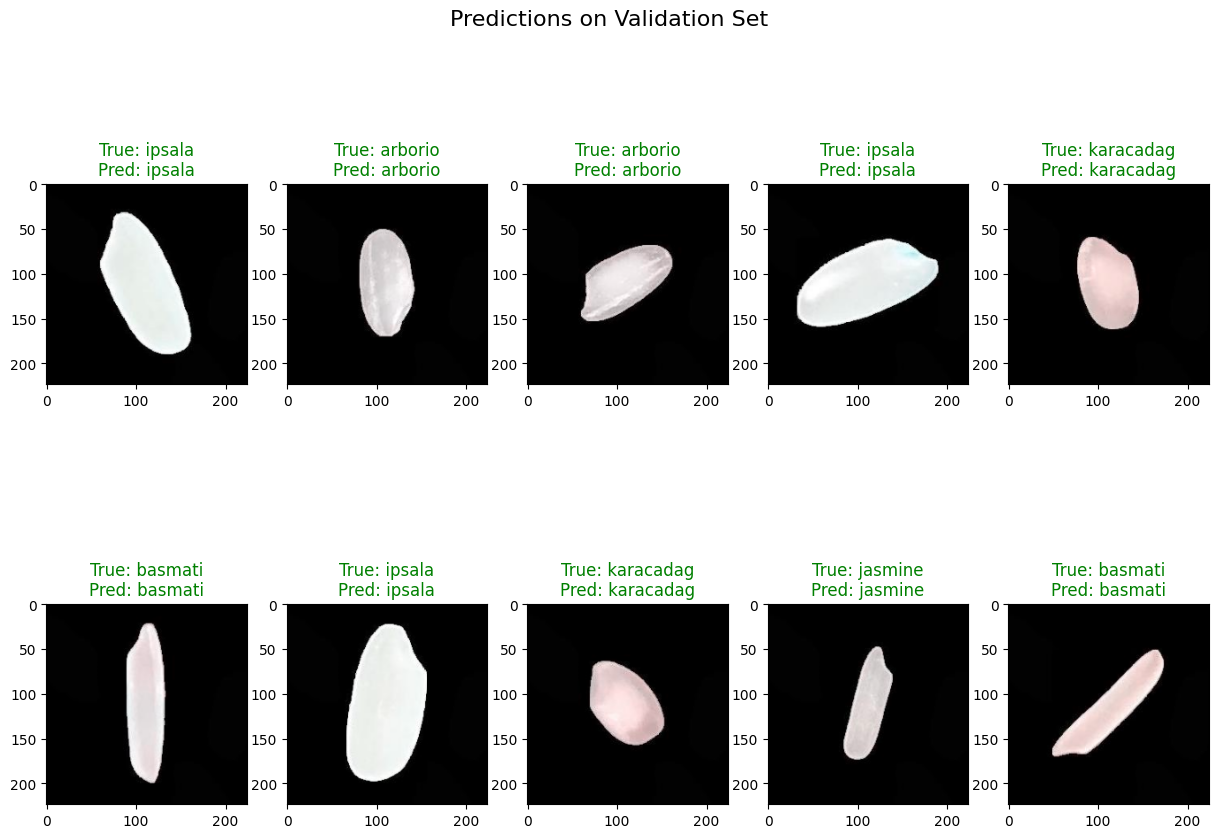

In [45]:


# Make predictions on the validation set

predictions = model.predict(X_val)

predicted_labels = np.argmax(predictions, axis=1)  # Get the index of the highest probability



# Define the number of images to display

num_images = 10

plt.figure(figsize=(15, 10))



# Plot some predictions

for i in range(num_images):

    plt.subplot(2, 5, i + 1)

    plt.imshow(X_val[i])  # Show the image

    plt.axis('on')  # Turn off axis



    # Get the true and predicted labels

    true_label = categories[y_val[i]]

    predicted_label = categories[predicted_labels[i]]



    # Set title with the true and predicted labels

    plt.title(f"True: {true_label}\nPred: {predicted_label}", color="green" if true_label == predicted_label else "red")



plt.suptitle("Predictions on Validation Set", fontsize=16)

plt.show()
